In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout,Dense,Conv2D,MaxPool2D,Flatten

2021-09-24 14:36:17.572205: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


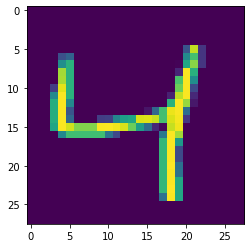

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [7]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [8]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [9]:
x_train.min(),x_train.max()

(0, 255)

In [10]:
y_train.min(),y_train.max()

(0, 9)

In [11]:
# Normalize
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [13]:
# reshape
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [14]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
input_shape=x_train[0].shape
#28,28,1

In [16]:
model = tf.keras.models.Sequential()

2021-09-24 14:44:52.871907: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-24 14:44:52.872550: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-24 14:44:52.872577: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-24 14:44:52.872613: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (siddharth): /proc/driver/nvidia/version does not exist
2021-09-24 14:44:52.873377: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorF

In [18]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

2021-09-24 14:52:12.554955: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-09-24 14:52:13.153464: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-24 14:52:13.247813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.8956

2021-09-24 14:53:20.677628: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


469/469 [==============================] - 69s 145ms/step - loss: 0.3553 - accuracy: 0.8957 - val_loss: 0.0537 - val_accuracy: 0.9829
Epoch 2/10
469/469 [==============================] - 71s 150ms/step - loss: 0.0519 - accuracy: 0.9836 - val_loss: 0.0441 - val_accuracy: 0.9861
Epoch 3/10
469/469 [==============================] - 59s 127ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0358 - val_accuracy: 0.9875
Epoch 4/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0311 - val_accuracy: 0.9899
Epoch 5/10
342/469 [====================>.........] - ETA: 15s - loss: 0.0205 - accuracy: 0.9930